## 深度循环神经网络
到⽬前为⽌，我们只讨论了具有⼀个单向隐藏层的循环神经⽹络。其中，隐变量和观测值与具体的函数形式
的交互⽅式是相当随意的。只要交互类型建模具有⾜够的灵活性，这就不是⼀个⼤问题。然⽽，对⼀个单层
来说，这可能具有相当的挑战性。之前在线性模型中，我们通过添加更多的层来解决这个问题。⽽在循环神
经⽹络中，我们⾸先需要确定如何添加更多的层，以及在哪⾥添加额外的⾮线性，因此这个问题有点棘⼿。

事实上，我们可以将多层循环神经⽹络堆叠在⼀起，通过对⼏个简单层的组合，产⽣了⼀个灵活的机制。特
别是，数据可能与不同层的堆叠有关。例如，我们可能希望保持有关⾦融市场状况（熊市或⽜市）的宏观数
据可⽤，⽽微观数据只记录较短期的时间动态。

图9.3.1描述了⼀个具有L个隐藏层的深度循环神经⽹络，每个隐状态都连续地传递到当前层的下⼀个时间步
和下⼀层的当前时间步。

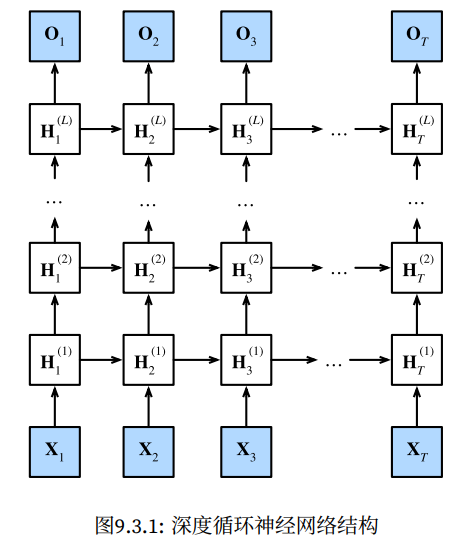

## 函数依赖关系
我们可以将深度架构中的函数依赖关系形式化，这个架构是由 图9.3.1中描述了L个隐藏层构成。后续的讨论
主要集中在经典的循环神经⽹络模型上，但是这些讨论也适应于其他序列模型。

假设在时间步t有⼀个⼩批量的输⼊数据 Xt ∈ R
n×d （样本数：n，每个样本中的输⼊数：d）。同时，将lth隐
藏层（l = 1, . . . , L）的隐状态设为H(l)
t ∈ Rn×h （隐藏单元数：h），输出层变量设为Ot ∈ R
n×q （输出数：q）。设置H(0)t = Xt，第l个隐藏层的隐状态使⽤激活函数ϕl，则：  

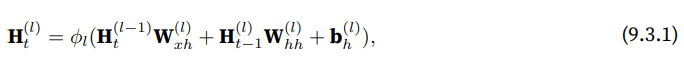  

其中，权重W(l)xh ∈ Rh×h，W(l)hh ∈ Rh×h和偏置b(l)h ∈ R1×h 都是第l个隐藏层的模型参数。  

最后，输出层的计算仅基于第l个隐藏层最终的隐状态：  

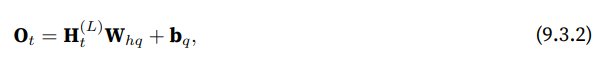  

其中，权重Whq ∈ Rh×q和偏置bq ∈ R1×q都是输出层的模型参数。  

与多层感知机⼀样，隐藏层数⽬L和隐藏单元数⽬h都是超参数。也就是说，它们可以由我们调整的。另外，
⽤⻔控循环单元或⻓短期记忆⽹络的隐状态来代替 (9.3.1)中的隐状态进⾏计算，可以很容易地得到深度⻔控
循环神经⽹络或深度⻓短期记忆神经⽹络。



## 简洁实现
实现多层循环神经⽹络所需的许多逻辑细节在⾼级API中都是现成的。简单起⻅，我们仅⽰范使⽤此类内置
函数的实现⽅式。以⻓短期记忆⽹络模型为例，该代码与之前在 9.2节中使⽤的代码⾮常相似，实际上唯⼀
的区别是我们指定了层的数量，⽽不是使⽤单⼀层这个默认值。像往常⼀样，我们从加载数据集开始。


In [1]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)


像选择超参数这类架构决策也跟 9.2节中的决策⾮常相似。因为我们有不同的词元，所以输⼊和输出都选择
相同数量，即vocab_size。隐藏单元的数量仍然是256。唯⼀的区别是，我们现在通过num_layers的值来设定
隐藏层数。


In [2]:
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
device = d2l.try_gpu()
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

## 训练与预测
由于使⽤了⻓短期记忆⽹络模型来实例化两个层，因此训练速度被⼤⼤降低了。

perplexity 1.0, 40958.8 tokens/sec on cuda:0
time traveller with a slight accession ofcheerfulness really thi
travelleryou can show black is white by argument said filby


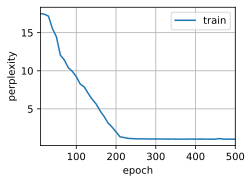

In [3]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr*1.0, num_epochs, device)

## 小结
* 在深度循环神经⽹络中，隐状态的信息被传递到当前层的下⼀时间步和下⼀层的当前时间步。
* 有许多不同⻛格的深度循环神经⽹络，如⻓短期记忆⽹络、⻔控循环单元、或经典循环神经⽹络。这些模型在深度学习框架的⾼级API中都有涵盖。
* 总体⽽⾔，深度循环神经⽹络需要⼤量的调参（如学习率和修剪）来确保合适的收敛，模型的初始化也需要谨慎。
